<a href="https://colab.research.google.com/github/aadithya-sesh68/pyprojects/blob/main/CrimeVisualization_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Sriramajayam")

Sriramajayam


In [2]:
#Importing the required packages/libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Scikit-learn - ML methods
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
df = pd.read_csv('sample_data/Major_Crime_Indicators.csv',sep=',')
df['Total'] = 1
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-8.859749e+06,5.423033e+06,10182,GO-20142103239,D23,2014/05/18 04:00:00+00,2014/05/18 04:00:00+00,House,1430,100,Assault,2014,May,18,138,Sunday,12,2014.0,May,18.0,138.0,Sunday,12,Assault,1,West Humber-Clairville (1),-79.588477,43.725321,1,1
1,-8.861050e+06,5.426864e+06,10298,GO-20142111528,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Outside,1430,100,Assault,2014,May,19,139,Monday,21,2014.0,May,19.0,139.0,Monday,20,Assault,1,West Humber-Clairville (1),-79.600166,43.750187,2,1
2,-8.861412e+06,5.422084e+06,10300,GO-20142111859,D23,2014/05/19 04:00:00+00,2014/05/19 04:00:00+00,Apartment,2120,200,B&E,2014,May,19,139,Monday,22,2014.0,May,19.0,139.0,Monday,22,Break and Enter,1,West Humber-Clairville (1),-79.603420,43.719158,3,1
3,-8.859955e+06,5.424372e+06,10345,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,100,Assault With Weapon,2014,May,20,140,Tuesday,14,2014.0,May,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,4,1
4,-8.859955e+06,5.424372e+06,10346,GO-20142116041,D23,2014/05/20 04:00:00+00,2014/05/20 04:00:00+00,Outside,1420,110,Assault Bodily Harm,2014,May,20,140,Tuesday,14,2014.0,May,20.0,140.0,Tuesday,14,Assault,1,West Humber-Clairville (1),-79.590332,43.734013,5,1


In [34]:
dfshape = df.shape
print(dfshape)

(242879, 30)


# Proportion of Crime acc. to Premise Type

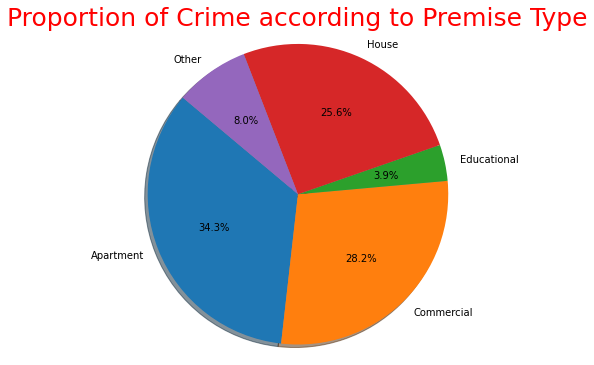

In [49]:
premise_type = df.groupby('premises_type').size()
premise_type.head()
plabels=['Apartment','Commercial','Educational','House','Other']
pcounts=[59292,48741,6728,44148,13846]
explode=(0,0,0,0,0)

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pcounts,explode=explode, labels=plabels, autopct='%1.1f%%', shadow=True, startangle=140)
ax.axis('equal')
plt.title('Proportion of Crime according to Premise Type', color='red', fontsize=25)
plt.show()

# Plotting bar graph for 'Robbery' Crimes in Toronto

                          offence  size
0          Robbery - Armoured Car    42
1                   Robbery - Atm    85
2              Robbery - Business  3428
3       Robbery - Delivery Person   251
4   Robbery - Financial Institute   785
5         Robbery - Home Invasion   982
6               Robbery - Mugging  7500
7                 Robbery - Other  4039
8          Robbery - Purse Snatch   914
9              Robbery - Swarming  2097
10                 Robbery - Taxi   245
11      Robbery - Vehicle Jacking   522
12            Robbery With Weapon  4072


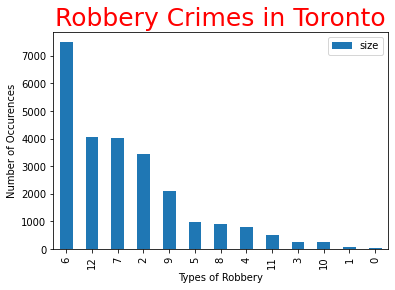

In [59]:
robbery = df[df['MCI'] == 'Robbery']
robberytypes = bande.groupby('offence',as_index=False).size()
print(robberytypes)

#plt.subplots(figsize = (15,6))
ct = robberytypes.sort_values(by='size',ascending=False)
ax = ct.plot.bar()
ax.set_xlabel('Types of Robbery')
ax.set_ylabel('Number of Occurences')
ax.set_title('Robbery Crimes in Toronto', color='red', fontsize=25)
plt.show()

# Bar Graph for Major Crime Indicators

               MCI    size
0          Assault  130358
1       Auto Theft   29158
2  Break and Enter   50335
3          Robbery   24962
4       Theft Over    8066




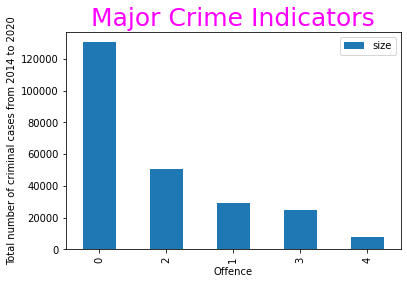

In [62]:
mci = df.groupby('MCI',as_index=False).size()
print(mci)
print('\n')
#plt.subplots(figsize = (15,6))
ct = mci.sort_values(by='size',ascending=False)
ax = ct.plot.bar()
ax.set_xlabel('Offence')
ax.set_ylabel('Total number of criminal cases from 2014 to 2020')
ax.set_title('Major Crime Indicators', color='magenta', fontsize=25)
plt.show()

# Hourly Occurences of different Crime Types - A Line Chart

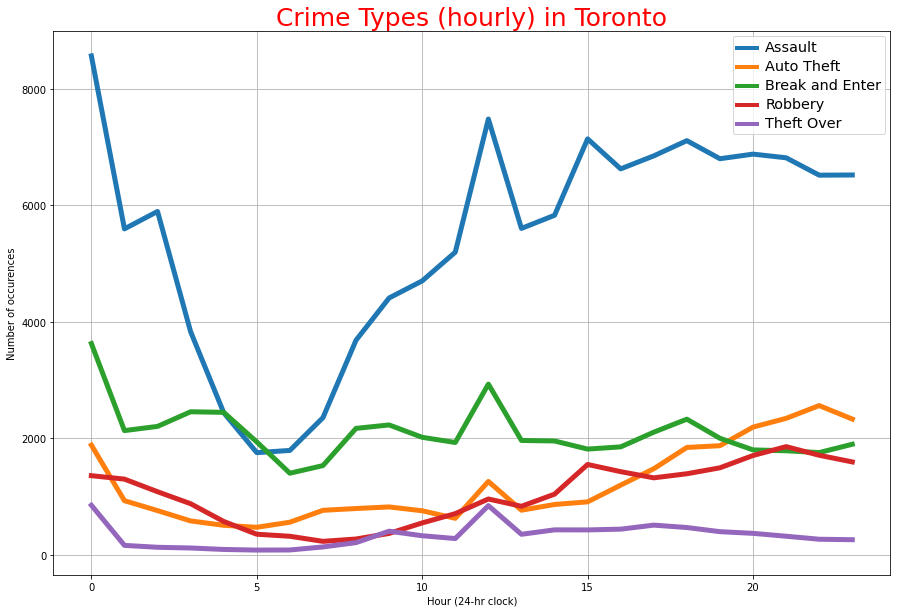

In [65]:
hourly_crime = df.groupby(['occurrencehour', 'MCI'], as_index=False).agg({'Total':'sum'})
fig, ax = plt.subplots(figsize=(15,10))
hourly_crime.groupby('MCI').plot(x='occurrencehour',y='Total', ax=ax, linewidth=5)
ax.set_xlabel('Hour (24-hr clock)')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types (hourly) in Toronto', color='red', fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in hourly_crime.groupby('MCI')['MCI']])
leglines = leg.get_lines()
legtexts = leg.get_texts()

plt.setp(leglines, linewidth=4)
plt.setp(legtexts, fontsize='x-large')
plt.show()